Q4: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Importing data
df = pd.read_excel("fifa_world_cup_cleaned.xlsx", header=None)
df.columns = [
    "date", "home_team", "away_team", "home_region", "away_region",
    "home_rank", "away_rank", "neutral", "importance", "home_score",
    "away_score", "tournament", "city", "venue", "neutral_flag",
    "extra_col", "result"
]

In [10]:
#team based data
home_df = df[["home_team", "away_team", "home_score", "away_score"]].copy()
home_df.columns = ["team", "opponent", "goals_for", "goals_against"]

away_df = df[["away_team", "home_team", "away_score", "home_score"]].copy()
away_df.columns = ["team", "opponent", "goals_for", "goals_against"]

team_stats = pd.concat([home_df, away_df], ignore_index=True)

In [5]:
#grouping by team
team_summary = team_stats.groupby("team").agg(
    matches_played=("goals_for", "count"),
    avg_goals_scored=("goals_for", "mean"),
    avg_goals_conceded=("goals_against", "mean"),
    std_goals_scored=("goals_for", "std"),
    std_goals_conceded=("goals_against", "std")
).reset_index()

In [6]:
#goal diffrence
team_summary["avg_goal_diff"] = team_summary["avg_goals_scored"] - team_summary["avg_goals_conceded"]
team_summary["std_goal_diff"] = team_summary[["avg_goals_scored", "avg_goals_conceded"]].std(axis=1)

In [9]:
#Numerical data
team_summary["consistency_score"] = -team_summary["std_goals_scored"] - team_summary["std_goals_conceded"] + team_summary["avg_goal_diff"]

top_consistent = team_summary.sort_values(by="consistency_score", ascending=False).head(10)
print(top_consistent[["team", "matches_played", "avg_goals_scored", "avg_goals_conceded", "std_goals_scored", "std_goals_conceded", "avg_goal_diff", "consistency_score"]])


            team  matches_played  avg_goals_scored  avg_goals_conceded  \
27        Brazil             433          2.203233            0.692841   
174        Spain             354          2.206215            0.700565   
71        France             370          1.810811            0.718919   
62       England             334          1.886228            0.751497   
134  Netherlands             340          2.058824            0.844118   
95         Italy             351          1.589744            0.806268   
129      Morocco             323          1.535604            0.743034   
152     Portugal             336          1.988095            0.797619   
8      Argentina             367          1.790191            0.904632   
163      Senegal             325          1.390769            0.889231   

     std_goals_scored  std_goals_conceded  avg_goal_diff  consistency_score  
27           1.716016            0.902860       1.510393          -1.108484  
174          1.749096        

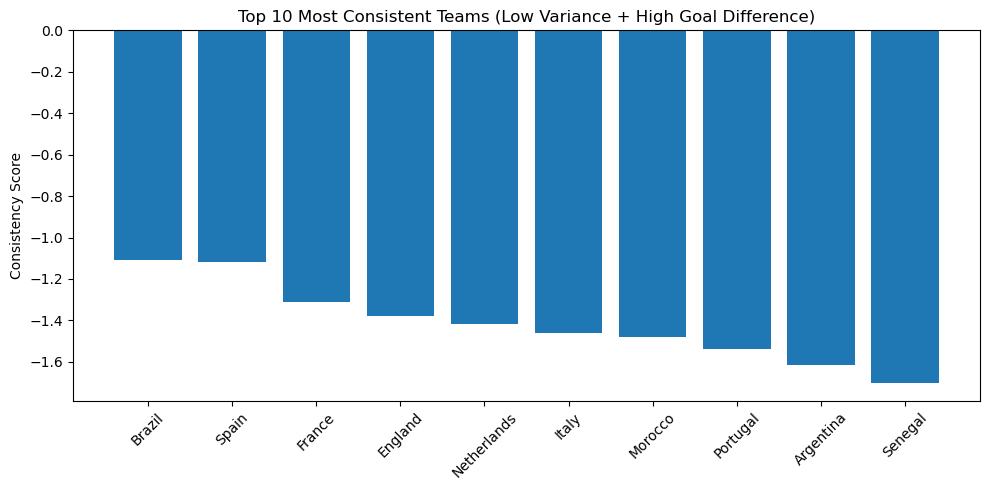

In [11]:
#Graph
plt.figure(figsize=(10,5))
plt.bar(top_consistent["team"], top_consistent["consistency_score"])
plt.title("Top 10 Most Consistent Teams (Low Variance + High Goal Difference)")
plt.ylabel("Consistency Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Answer
To find out which teams performed most consistently across all matches, I looked at how steady their scoring and defending were. I used the standard deviation of goals scored and conceded to measure how much a team's performance changed from game to game. A team with low variation in both scoring and conceding is considered more consistent. I also included goal difference to make sure the team wasn’t just consistent, but also successful. The teams with the highest consistency scores balanced strong performance with steady results, showing they didn’t just play well occasionally, they played well consistently.

